In [ ]:
#calculate volumes of each binary lesion, correlate size with clinical outcomes, dbs cohort compared to lesions

In [1]:
from nilearn import image
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
import numpy as np
import nibabel as nib
import pandas as pd
import os, glob
from matplotlib import pyplot as plt
import seaborn as sns
import shutil
import scipy
from scipy.stats import pearsonr, spearmanr

In [65]:
#resample all subjects to MNI brain
mni = load_img('/Users/jp1590/Desktop/MNI152_T1_0.5mm.nii.gz')
zone12 = os.listdir('/Volumes/Cingulate/Cingulotomy/segmentations/cing/z2')
for i in zone12:
    if i.startswith('.DS'):
        print()
    else:
        sub = load_img(f'/Volumes/Cingulate/Cingulotomy/segmentations/cing/z2/{i}')
        sub_re = resample_to_img(sub,mni)
        nib.save(sub_re,f'/Volumes/Cingulate/Cingulotomy/segmentations/cing/resample/{i}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")
/Library/Framework

In [66]:
#binarize zones 1-2
for i in zone12:
    if i.startswith('.DS'):
        print()
    else:
        sub_n = load_img(f'/Volumes/Cingulate/Cingulotomy/segmentations/cing/resample/{i}')
        sub_bi = math_img('img > 0.9', img=sub_n)
        sub_bi.to_filename(f'/Volumes/Cingulate/Cingulotomy/segmentations/cing/binary/{i}')

In [25]:
#load segmentations for zone 1
sct_pth = sorted(glob.glob(os.path.join('/Volumes/Cingulate/Cingulotomy/segmentations/sct/z1-2/','*-simbio.nii')))
sct_vols = [image.load_img(i).get_fdata() for i in sct_pth]

cing_pth = sorted(glob.glob(os.path.join('/Volumes/Cingulate/Cingulotomy/segmentations/cing/z1-2/','*-simbio.nii')))
cing_vols = [image.load_img(i).get_fdata() for i in cing_pth]

# c_cap_pth = sorted(glob.glob(os.path.join('/Volumes/Cingulate/Cingulotomy/segmentations/cap/z1/canada/','*.nii')))
# c_cap_vols = [image.load_img(i).get_fdata() for i in c_cap_pth]

# b_cap_pth = sorted(glob.glob(os.path.join('/Volumes/Cingulate/Cingulotomy/segmentations/cap/z1/brazil/','*.nii')))
# b_cap_vols = [image.load_img(i).get_fdata() for i in b_cap_pth]

In [26]:
#sum voxel values contained in patient-specific lesion for zone 1
cing_total_inf_vol = []
for i,v in enumerate(cing_vols):
    cing_total_inf_vol.append(np.sum(v))

sct_total_inf_vol = []
for i,v in enumerate(sct_vols):
    sct_total_inf_vol.append(np.sum(v))
    
# c_cap_total_inf_vol = []
# for i,v in enumerate(c_cap_vols):
#     c_cap_total_inf_vol.append(np.sum(v))
    
# b_cap_total_inf_vol = []
# for i,v in enumerate(b_cap_vols):
#     b_cap_total_inf_vol.append(np.sum(v))

In [27]:
#save csvs
sct_df = pd.DataFrame(sct_total_inf_vol)
sct_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_total_vol_z1-2.csv')

cing_df = pd.DataFrame(cing_total_inf_vol)
cing_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z1-2.csv')

# c_cap_df = pd.DataFrame(c_cap_total_inf_vol)
# c_cap_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/c_cap_total_vol_z1.csv')

# b_cap_df = pd.DataFrame(b_cap_total_inf_vol)
# b_cap_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/b_cap_total_vol_z1.csv')

In [28]:
#create ids csv
# b_cap_ids = []
# for i in b_cap_pth:
#     b_cap_ids.append(f'{i[59:68]}_B')

# b_cap_id_df = pd.DataFrame(b_cap_ids)
# b_cap_id_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/b_cap_id.csv')

# c_cap_ids = []
# for i in c_cap_pth:
#     c_cap_ids.append(f'{i[59:69]}_C')

# c_cap_id_df = pd.DataFrame(c_cap_ids)
# c_cap_id_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/c_cap_id.csv')

sct_ids = []
for i in sct_pth:
    sct_ids.append(i[54:69])

sct_id_df = pd.DataFrame(sct_ids)
sct_id_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_id.csv')

cing_ids = []
for i in cing_pth:
    cing_ids.append(i[55:71])

cing_id_df = pd.DataFrame(cing_ids)
cing_id_df.to_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_id.csv')

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_4174/1932989228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=s_df['ID'],y=s_df['Total_Volume'],palette='rocket_r')


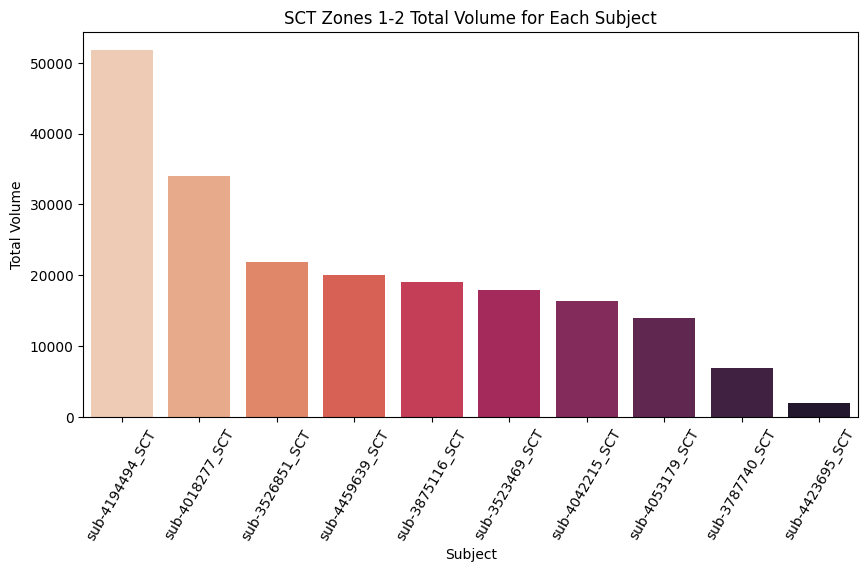

In [18]:
#sct bar plot of each individual subject's total volume
s_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_total_vol_z1-2.csv')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=s_df['ID'],y=s_df['Total_Volume'],palette='rocket_r')
ax.set(title = 'SCT Zones 1-2 Total Volume for Each Subject',xlabel='Subject', ylabel='Total Volume')
ax.tick_params(axis='x', rotation=60)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_4174/894244987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=c_df['ID'],y=c_df['Total_Volume'],palette='rocket_r')


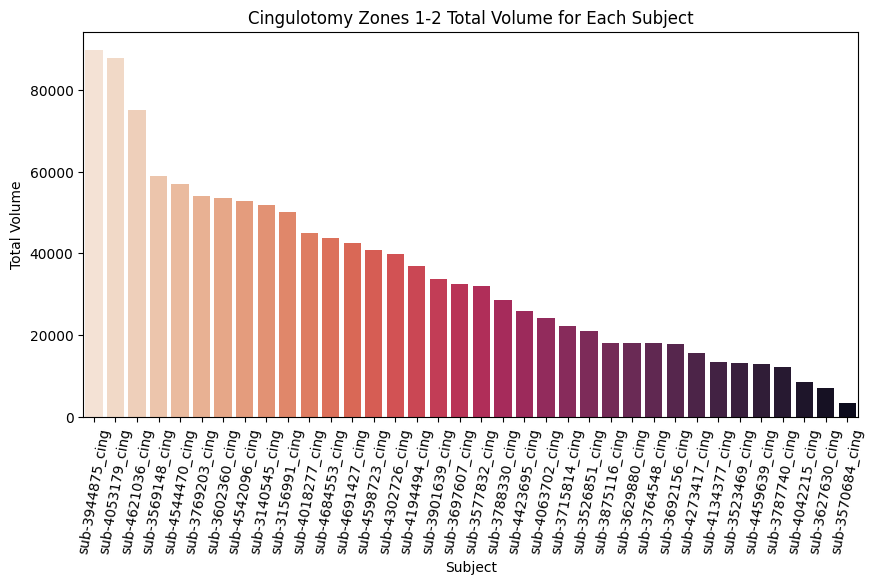

In [19]:
#cing bar plot of each individual subject's total volume
c_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z1-2.csv')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=c_df['ID'],y=c_df['Total_Volume'],palette='rocket_r')
ax.set(title = 'Cingulotomy Zones 1-2 Total Volume for Each Subject',xlabel='Subject', ylabel='Total Volume')
ax.tick_params(axis='x', rotation=80)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_4174/648433967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ca_df['ID'],y=ca_df['Total_Volume'],palette='rocket_r')


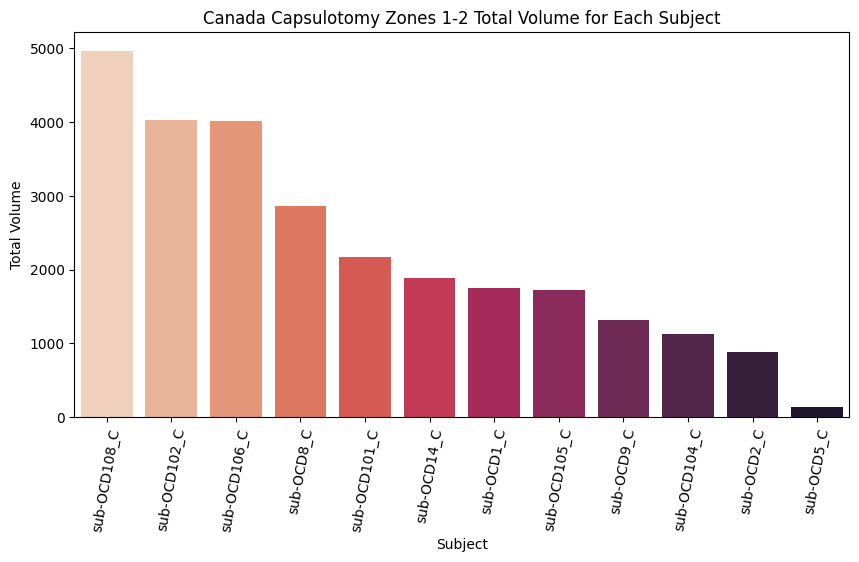

In [21]:
#canada bar plot of each individual subject's total volume
ca_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/1y_canada_cap_total_vol_z1-2.csv')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=ca_df['ID'],y=ca_df['Total_Volume'],palette='rocket_r')
ax.set(title = 'Canada Capsulotomy Zones 1-2 Total Volume for Each Subject',xlabel='Subject', ylabel='Total Volume')
ax.tick_params(axis='x', rotation=80)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_4174/4257786452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=b_df['ID'],y=b_df['Total_Volume'],palette='rocket_r')


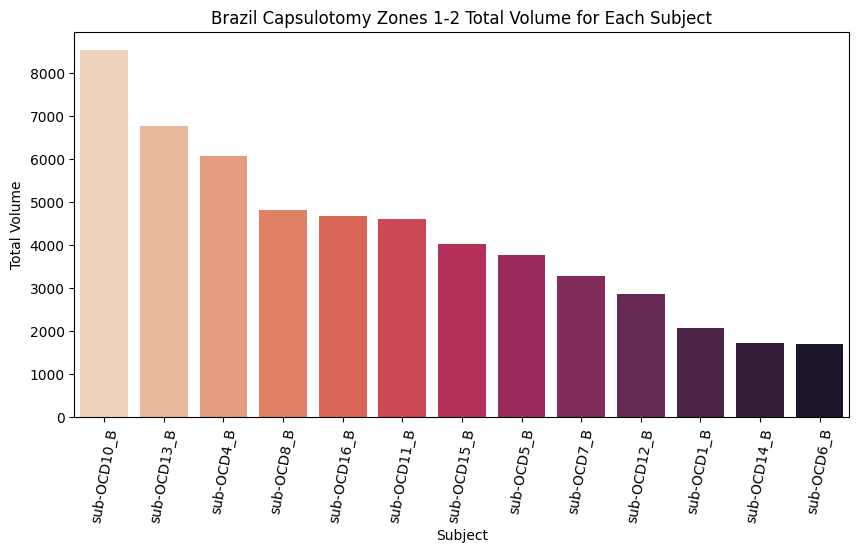

In [22]:
#brazil bar plot of each individual subject's total volume
b_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/1y_brazil_cap_total_vol_z1-2.csv')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=b_df['ID'],y=b_df['Total_Volume'],palette='rocket_r')
ax.set(title = 'Brazil Capsulotomy Zones 1-2 Total Volume for Each Subject',xlabel='Subject', ylabel='Total Volume')
ax.tick_params(axis='x', rotation=80)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_98841/3354089720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=all_df['ID'],x=all_df['Total_Volume'],palette='rocket_r')


[Text(0, 0.5, 'Surgery Type'), Text(0.5, 0, 'Total Volume')]

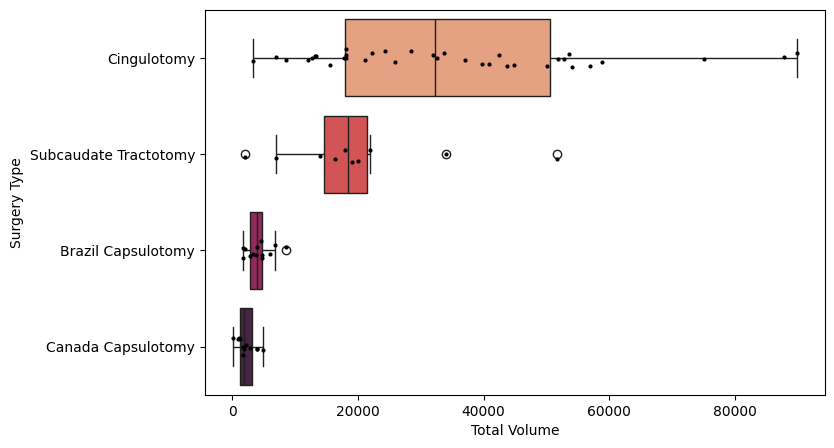

In [32]:
#Total Volume by Surgery Type
all_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/all_total_vol_type_z1-2.csv')
plt.figure(figsize=(8,5))
ax = sns.stripplot(data=all_df, x="Total_Volume", y="ID", s=3,color='black')
ax = sns.boxplot(y=all_df['ID'],x=all_df['Total_Volume'],palette='rocket_r')
ax.set(ylabel='Surgery Type', xlabel='Total Volume')

In [25]:
z12_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/all_total_vol_z1-2.csv')
z12_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(z12_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(z12_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(z12_df["Total_Volume"], z12_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(z12_df["Total_Volume"], z12_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 22186.8064516129
Relative YBOCS Change Mean: 35.587931340096766
PearsonRResult(statistic=-0.10385629137902772, pvalue=0.42180218390749247)
SignificanceResult(statistic=-0.0611548405174566, pvalue=0.6368009068514691)


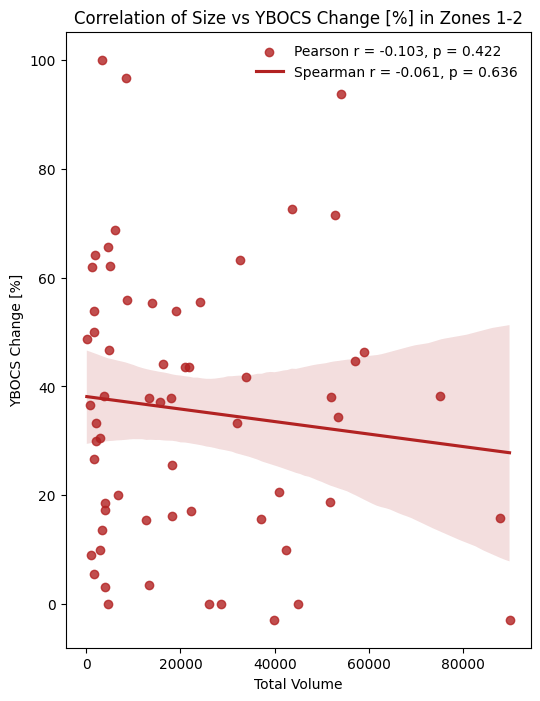

In [50]:
plt.figure(figsize=(6,8))
ax = sns.regplot(data=z12_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='firebrick')
ax.set(title='Correlation of Size vs YBOCS Change [%] in Zones 1-2',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.103, p = 0.422','Spearman r = -0.061, p = 0.636'],loc='upper right',frameon=False)

In [35]:
z1_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/all_total_vol_z1.csv')
z1_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(z1_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(z1_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(z1_df["Total_Volume"], z1_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(z1_df["Total_Volume"], z1_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 4953.854838709677
Relative YBOCS Change Mean: 35.3130014784516
PearsonRResult(statistic=-0.12779872347249335, pvalue=0.3222349090437229)
SignificanceResult(statistic=-0.061658587144453776, pvalue=0.6340222361043926)


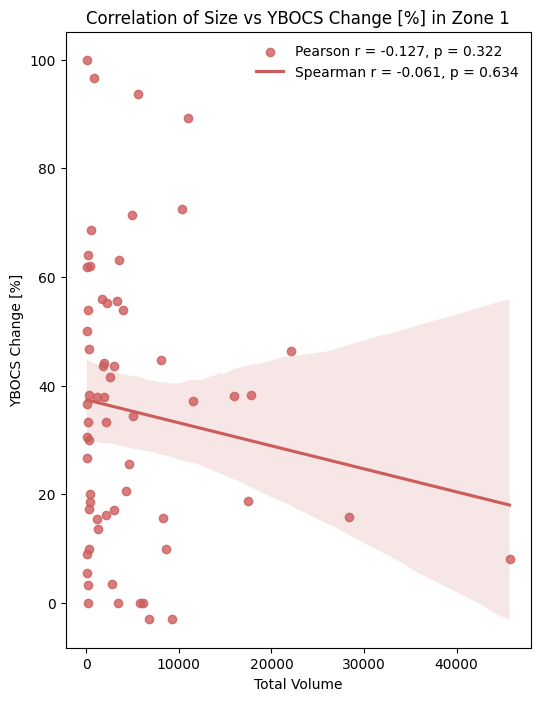

In [48]:
plt.figure(figsize=(6,8))
ax = sns.regplot(data=z1_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='indianred')
ax.set(title='Correlation of Size vs YBOCS Change [%] in Zone 1',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.127, p = 0.322','Spearman r = -0.061, p = 0.634'],loc='upper right',frameon=False)

In [41]:
z14_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing_sct_total_vol_z1-4.csv')
z14_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(z14_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(z14_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(z14_df["Total_Volume"], z14_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(z14_df["Total_Volume"], z14_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 164098.9
Relative YBOCS Change Mean: 35.91780334413333
PearsonRResult(statistic=-0.11245904733732395, pvalue=0.554070065128904)
SignificanceResult(statistic=-0.09591632892261477, pvalue=0.6141227360110947)


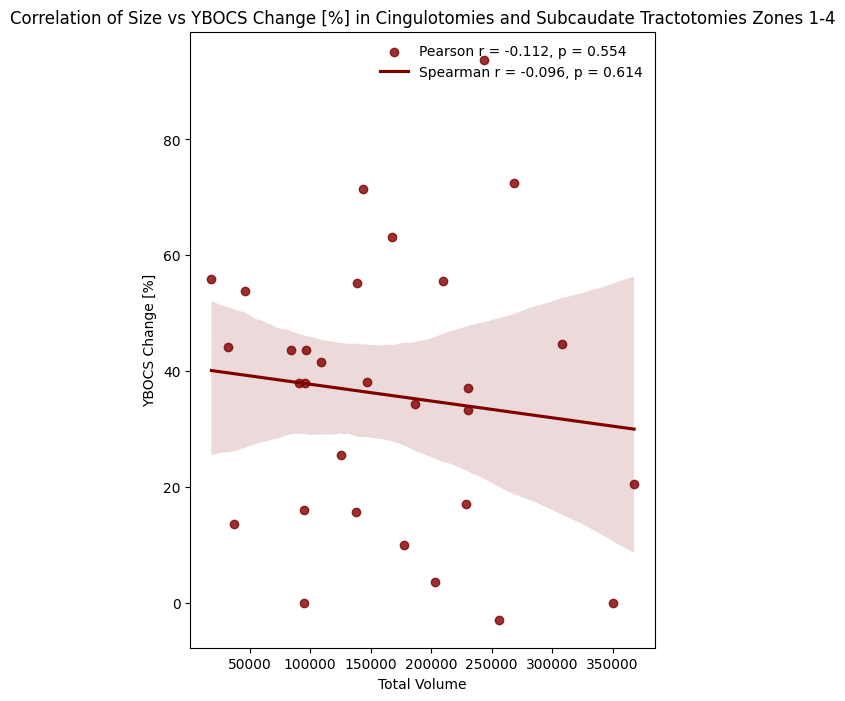

In [46]:
plt.figure(figsize=(6,8))
ax = sns.regplot(data=z14_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='maroon')
ax.set(title='Correlation of Size vs YBOCS Change [%] in Cingulotomies and Subcaudate Tractotomies Zones 1-4',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.112, p = 0.554','Spearman r = -0.096, p = 0.614'],loc='upper right',frameon=False)

In [72]:
cing14_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z1-4.csv')
cing14_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(cing14_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(cing14_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(cing14_df["Total_Volume"], cing14_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(cing14_df["Total_Volume"], cing14_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 183502.91666666666
Relative YBOCS Change Mean: 33.379987366
PearsonRResult(statistic=-0.02356764970244827, pvalue=0.9129576524960744)
SignificanceResult(statistic=-0.0017395086299452356, pvalue=0.9935636427760657)


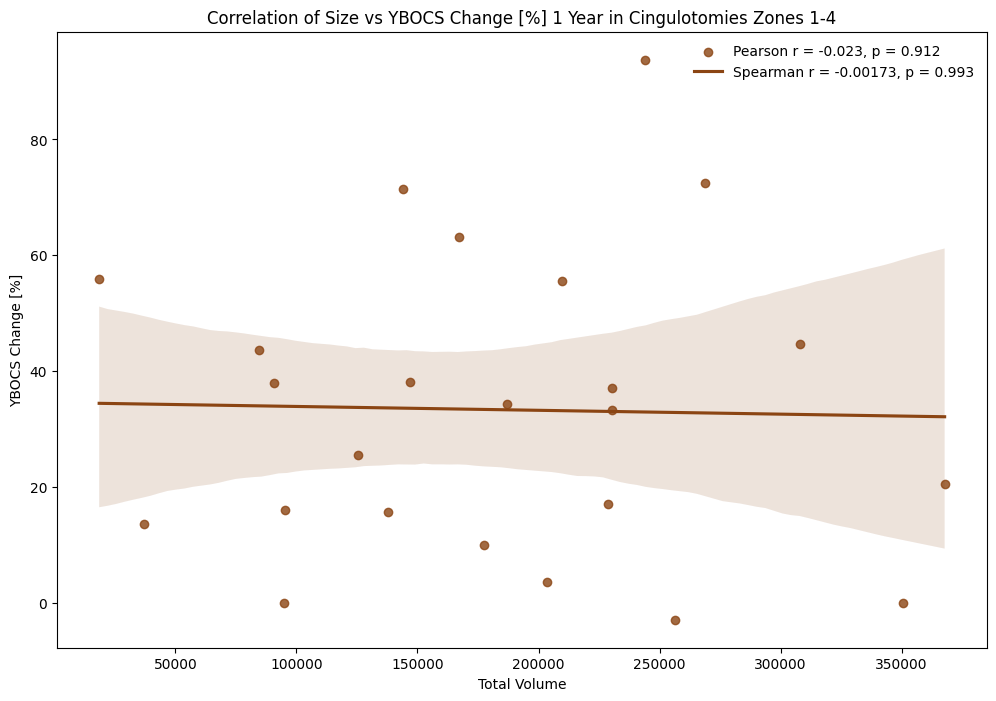

In [76]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=cing14_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='saddlebrown')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Cingulotomies Zones 1-4',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.023, p = 0.912','Spearman r = -0.00173, p = 0.993'],loc='upper right',frameon=False)

In [51]:
cing12_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z1-2.csv')
cing12_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(cing12_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(cing12_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(cing12_df["Total_Volume"], cing12_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(cing12_df["Total_Volume"], cing12_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 37298.566666666666
Relative YBOCS Change Mean: 30.461630894566667
PearsonRResult(statistic=0.06821111812041673, pvalue=0.720230998354455)
SignificanceResult(statistic=0.13533669318658278, pvalue=0.4758068472739303)


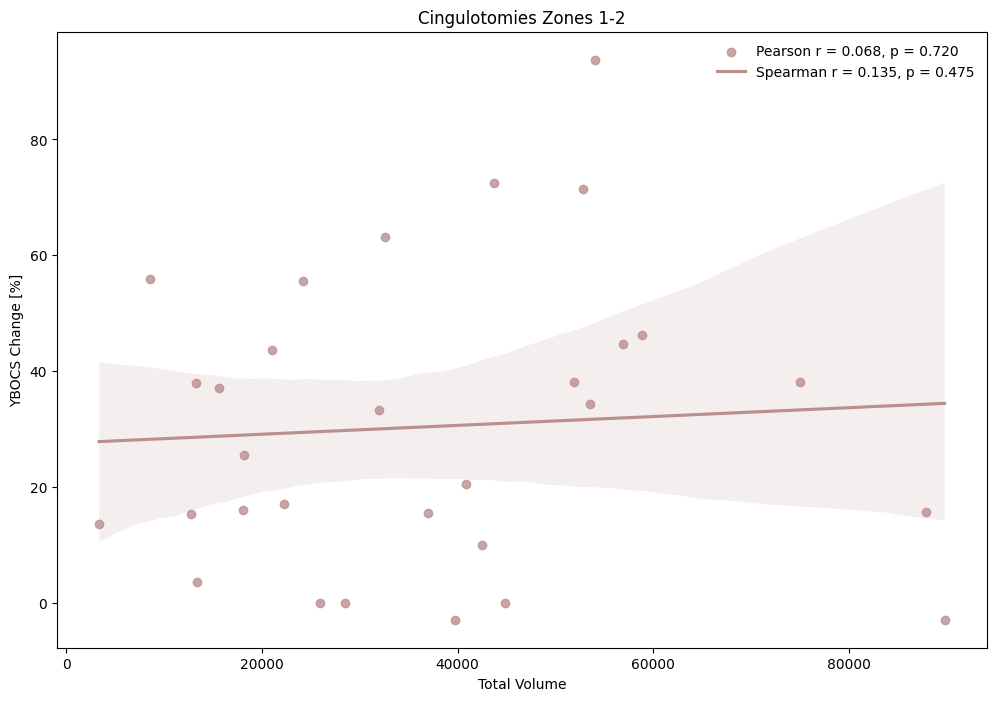

In [59]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=cing12_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='rosybrown')
ax.set(title='Cingulotomies Zones 1-2',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.068, p = 0.720','Spearman r = 0.135, p = 0.475'],loc='upper right',frameon=False)

In [60]:
cing1_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z1.csv')
cing1_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(cing1_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(cing1_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(cing1_df["Total_Volume"], cing1_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(cing1_df["Total_Volume"], cing1_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 8330.451612903225
Relative YBOCS Change Mean: 29.740549514354843
PearsonRResult(statistic=-0.09751788555944783, pvalue=0.6017462725671642)
SignificanceResult(statistic=-0.020171459952646062, pvalue=0.9142293877889679)


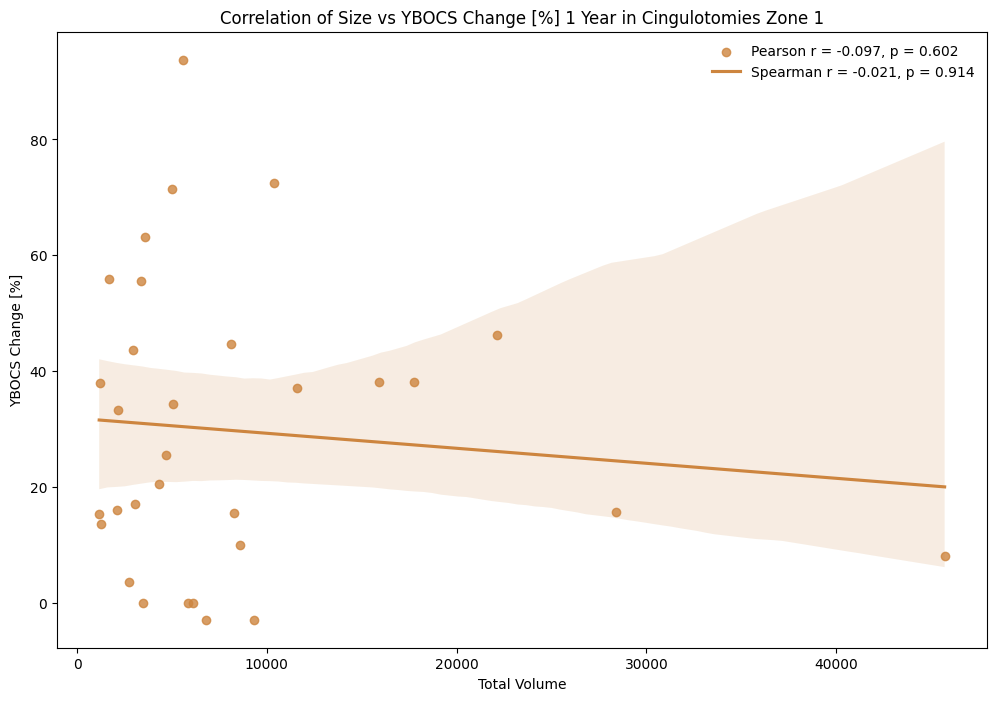

In [78]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=cing1_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='peru')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Cingulotomies Zone 1',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.097, p = 0.602','Spearman r = -0.021, p = 0.914'],loc='upper right',frameon=False)

In [113]:
cing3_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z3.csv')
cing3_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(cing1_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(cing3_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(cing3_df["Total_Volume"], cing3_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(cing3_df["Total_Volume"], cing3_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 8330.451612903225
Relative YBOCS Change Mean: 31.738099841833336
PearsonRResult(statistic=0.26855888777882475, pvalue=0.20447854633907364)
SignificanceResult(statistic=0.21656882442818184, pvalue=0.3094121208219955)


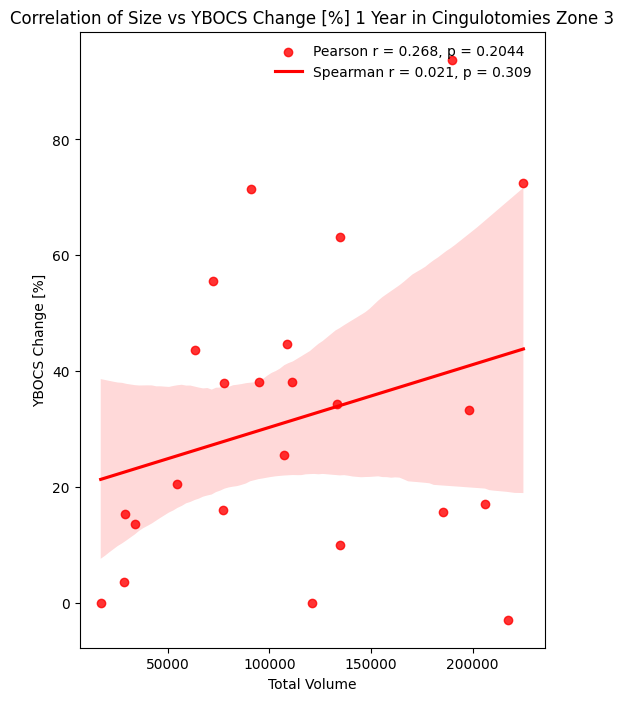

In [114]:
plt.figure(figsize=(6,8))
ax = sns.regplot(data=cing3_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='red')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Cingulotomies Zone 3',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.268, p = 0.2044','Spearman r = 0.021, p = 0.309'],loc='upper right',frameon=False)

In [115]:
cing4_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cing/csv/cing_total_vol_z4.csv')
cing4_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(cing1_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(cing4_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(cing4_df["Total_Volume"], cing4_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(cing4_df["Total_Volume"], cing4_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 8330.451612903225
Relative YBOCS Change Mean: 24.8904123062
PearsonRResult(statistic=0.06678548268590542, pvalue=0.9150293375967908)
SignificanceResult(statistic=0.09999999999999999, pvalue=0.8728885715695383)


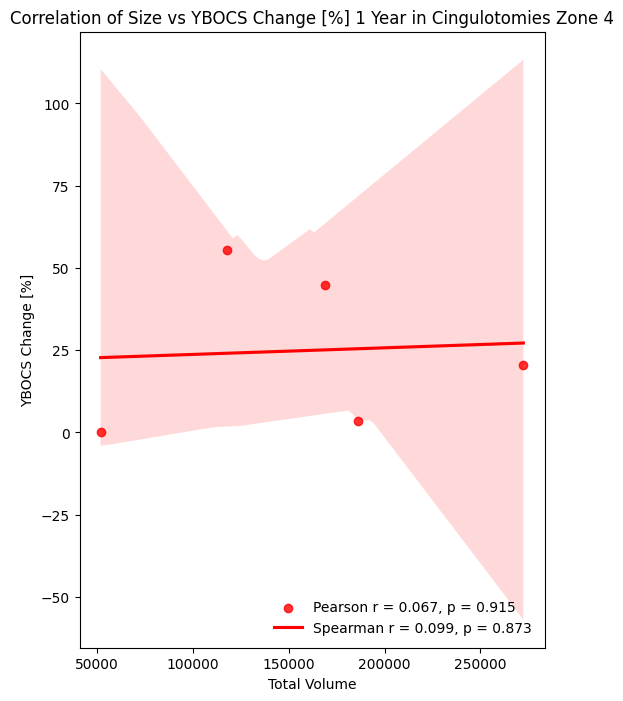

In [116]:
plt.figure(figsize=(6,8))
ax = sns.regplot(data=cing4_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='red')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Cingulotomies Zone 4',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.067, p = 0.915','Spearman r = 0.099, p = 0.873'],loc='lower right',frameon=False)

In [62]:
sct14_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_total_vol_z1-4.csv')
sct14_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(sct14_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(sct14_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(sct14_df["Total_Volume"], sct14_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(sct14_df["Total_Volume"], sct14_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 86482.83333333333
Relative YBOCS Change Mean: 46.06906725666666
PearsonRResult(statistic=0.054583403253870684, pvalue=0.9182062065934175)
SignificanceResult(statistic=0.08571428571428573, pvalue=0.8717434402332361)


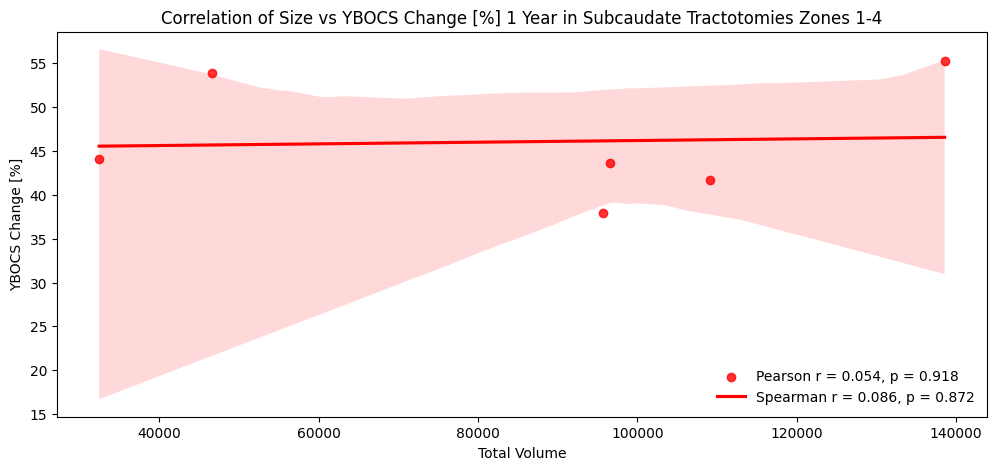

In [110]:
plt.figure(figsize=(12,5))
ax = sns.regplot(data=sct14_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='red')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Subcaudate Tractotomies Zones 1-4',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.054, p = 0.918','Spearman r = 0.086, p = 0.872'],loc='lower right',frameon=False)

In [64]:
sct12_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_total_vol_z1-2.csv')
sct12_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(sct12_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(sct12_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(sct12_df["Total_Volume"], sct12_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(sct12_df["Total_Volume"], sct12_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 24975.571428571428
Relative YBOCS Change Mean: 42.16634336285714
PearsonRResult(statistic=-0.854658084669234, pvalue=0.014280722723469278)
SignificanceResult(statistic=-0.7142857142857144, pvalue=0.0713435614675376)


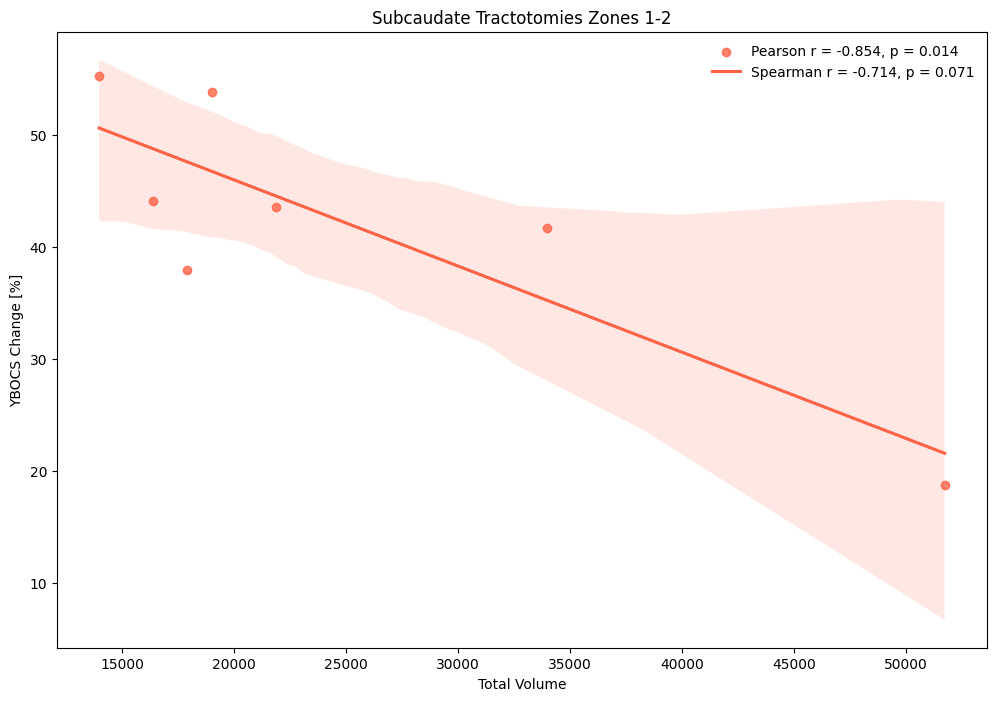

In [118]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=sct12_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='tomato')
ax.set(title='Subcaudate Tractotomies Zones 1-2',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.854, p = 0.014','Spearman r = -0.714, p = 0.071'],loc='upper right',frameon=False)

In [66]:
sct1_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_total_vol_z1.csv')
sct1_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(sct1_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(sct1_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(sct1_df["Total_Volume"], sct1_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(sct1_df["Total_Volume"], sct1_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 5371.75
Relative YBOCS Change Mean: 48.04419909125
PearsonRResult(statistic=-0.08757361859626817, pvalue=0.836637051400015)
SignificanceResult(statistic=0.023809523809523815, pvalue=0.9553740118158807)


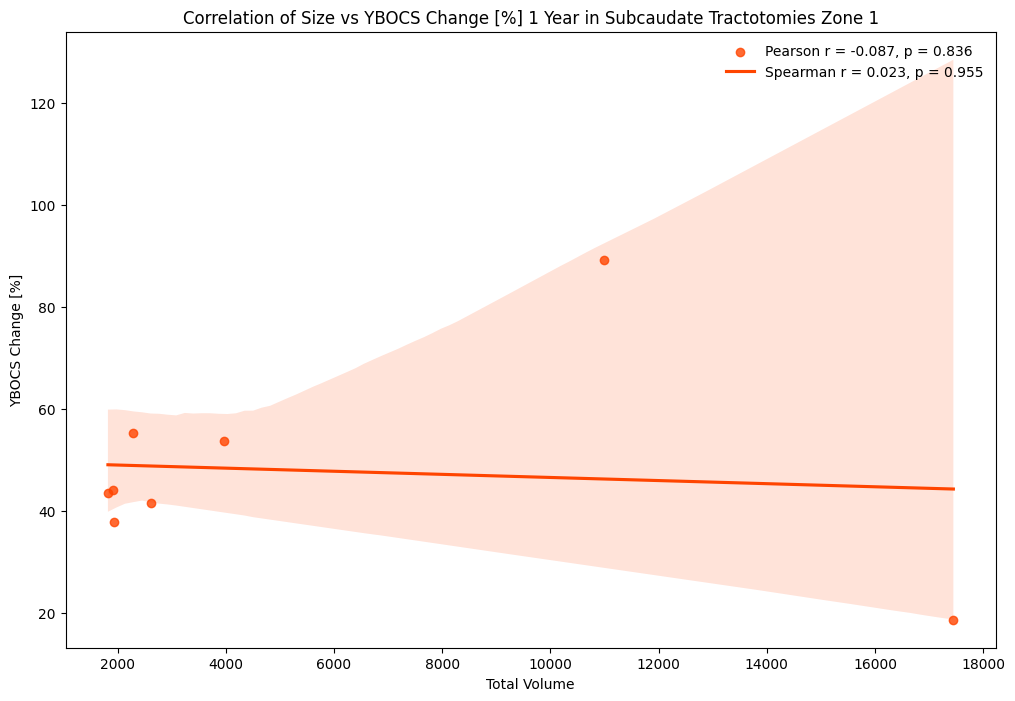

In [84]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=sct1_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='orangered')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Subcaudate Tractotomies Zone 1',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = -0.087, p = 0.836','Spearman r = 0.023, p = 0.955'],loc='upper right',frameon=False)

In [119]:
sct3_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/sct/csv/sct_total_vol_z3.csv')
sct3_df.dropna(subset=['Relative_YBOCS_Change_1y'], inplace=True)
print('Total Volume Mean:',np.mean(sct3_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(sct3_df["Relative_YBOCS_Change_1y"]))
print(pearsonr(sct3_df["Total_Volume"], sct3_df["Relative_YBOCS_Change_1y"]))
print(spearmanr(sct3_df["Total_Volume"], sct3_df["Relative_YBOCS_Change_1y"]))

Total Volume Mean: 88053.25
Relative YBOCS Change Mean: 44.6126506575
PearsonRResult(statistic=0.9305388962425947, pvalue=0.06946110375740533)
SignificanceResult(statistic=0.19999999999999998, pvalue=0.8)


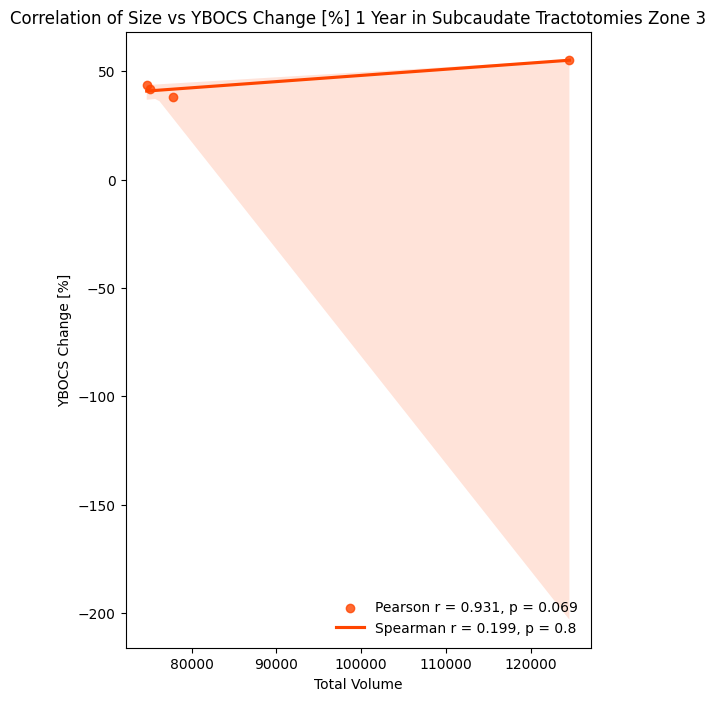

In [120]:
plt.figure(figsize=(6,8))
ax = sns.regplot(data=sct3_df, x="Total_Volume", y="Relative_YBOCS_Change_1y",color='orangered')
ax.set(title='Correlation of Size vs YBOCS Change [%] 1 Year in Subcaudate Tractotomies Zone 3',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.931, p = 0.069','Spearman r = 0.199, p = 0.8'],loc='lower right',frameon=False)

In [68]:
bc12_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/1y_all_cap_total_vol_z1-2.csv')
print('Total Volume Mean:',np.mean(bc12_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(bc12_df["Relative_YBOCS_Change"]))
print(pearsonr(bc12_df["Total_Volume"], bc12_df["Relative_YBOCS_Change"]))
print(spearmanr(bc12_df["Total_Volume"], bc12_df["Relative_YBOCS_Change"]))

Total Volume Mean: 3271.84
Relative YBOCS Change Mean: 39.89753650835999
PearsonRResult(statistic=0.24355163892097872, pvalue=0.24072237067240987)
SignificanceResult(statistic=0.1523076923076923, pvalue=0.46734387324425375)


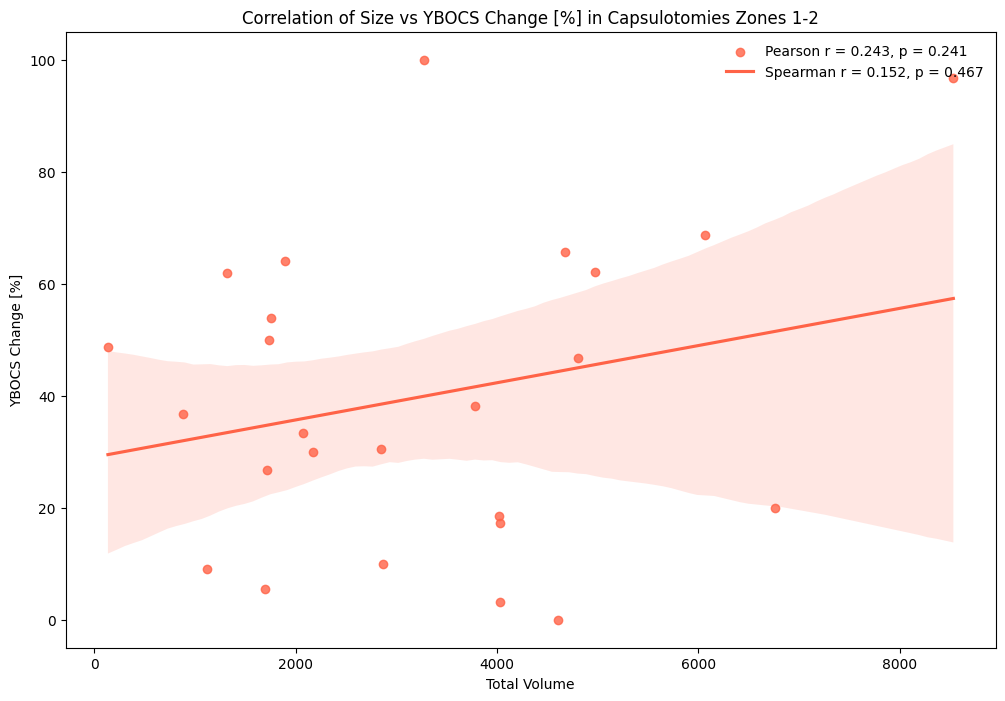

In [86]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=bc12_df, x="Total_Volume", y="Relative_YBOCS_Change",color='tomato')
ax.set(title='Correlation of Size vs YBOCS Change [%] in Capsulotomies Zones 1-2',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.243, p = 0.241','Spearman r = 0.152, p = 0.467'],loc='upper right',frameon=False)

In [70]:
bc1_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/cap/csv/1y_all_cap_total_vol_z1.csv')
bc1_df = bc1_df.dropna()
print('Total Volume Mean:',np.mean(bc1_df["Total_Volume"]))
print('Relative YBOCS Change Mean:',np.mean(bc1_df["Relative_YBOCS_Change"]))
print('Absolute YBOCS Change Mean:',np.mean(bc1_df["Absolute_YBOCS_Change"]))
print(pearsonr(bc1_df["Total_Volume"], bc1_df["Relative_YBOCS_Change"]))
print(spearmanr(bc1_df["Total_Volume"], bc1_df["Relative_YBOCS_Change"]))

Total Volume Mean: 257.4347826086956
Relative YBOCS Change Mean: 38.39545495604348
Absolute YBOCS Change Mean: 12.26086956521739
PearsonRResult(statistic=0.37802756341749666, pvalue=0.07531736007611377)
SignificanceResult(statistic=0.22826086956521738, pvalue=0.29483984718700545)


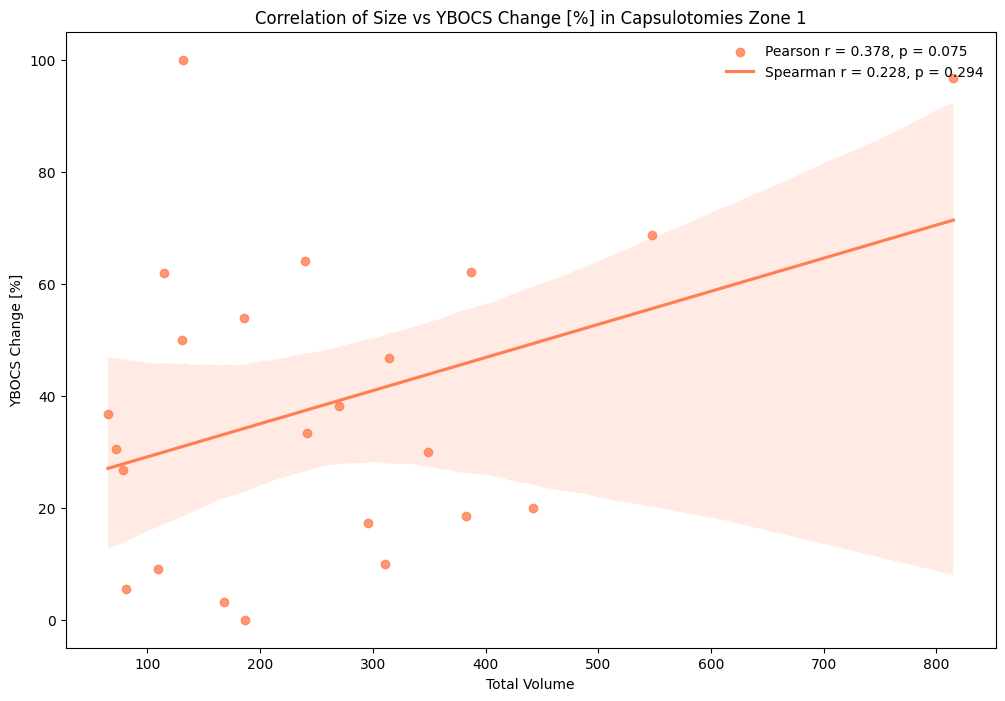

In [88]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=bc1_df, x="Total_Volume", y="Relative_YBOCS_Change",color='coral')
ax.set(title='Correlation of Size vs YBOCS Change [%] in Capsulotomies Zone 1',ylabel='YBOCS Change [%]',xlabel='Total Volume')
plt.legend(['Pearson r = 0.378, p = 0.075','Spearman r = 0.228, p = 0.294'],loc='upper right',frameon=False)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_4174/3834130120.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=centers['ID'],x=centers['Relative_YBOCS_Change'],palette='rocket_r',order=sorted_ids)


[Text(0, 0.5, 'Type of Surgery'), Text(0.5, 0, 'YBOCS Change [%]')]

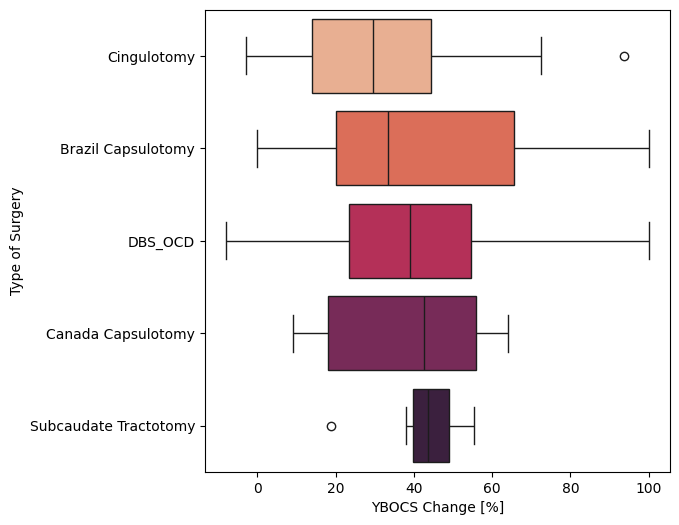

In [14]:
#Clinical Outcome by Surgery Type/Center
centers = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/Clinical-Outcomes.csv')
medians = centers.groupby('ID')['Relative_YBOCS_Change'].median().sort_values(ascending=True)
sorted_ids = medians.index.tolist()
plt.figure(figsize=(6,6))
#ax = sns.stripplot(data=centers, x="Relative_YBOCS_Change", y="ID", s=3,color='black')
ax = sns.boxplot(y=centers['ID'],x=centers['Relative_YBOCS_Change'],palette='rocket_r',order=sorted_ids)
ax.set(ylabel='Type of Surgery', xlabel='YBOCS Change [%]')

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_4174/208413341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=centers['ID'],x=centers['Relative_YBOCS_Change'],palette='rocket_r',order=sorted_ids)


[Text(0, 0.5, 'Center'), Text(0.5, 0, 'YBOCS Change [%]')]

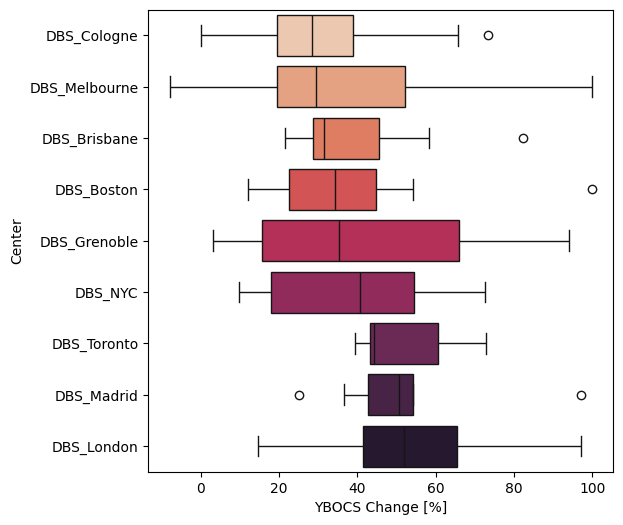

In [15]:
#Clinical Outcome by Surgery Type/Center
centers = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/Clinical-Outcomes-DBS.csv')
medians = centers.groupby('ID')['Relative_YBOCS_Change'].median().sort_values(ascending=True)
sorted_ids = medians.index.tolist()
plt.figure(figsize=(6,6))
#ax = sns.stripplot(data=centers, x="Relative_YBOCS_Change", y="ID", s=3,color='black')
ax = sns.boxplot(y=centers['ID'],x=centers['Relative_YBOCS_Change'],palette='rocket_r',order=sorted_ids)
ax.set(ylabel='Center', xlabel='YBOCS Change [%]')